In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
#append one more column as targert
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [19]:
#adding column flower_name from existing column
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [26]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


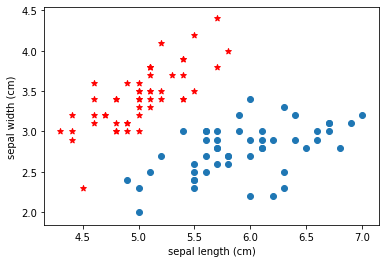

In [34]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = 'red',marker= '*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'])

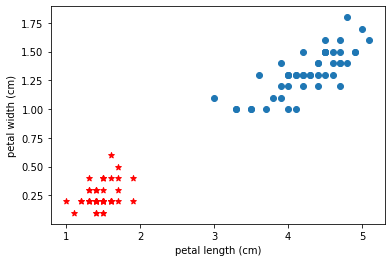

In [36]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'red',marker= '*')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])

In [37]:
#train model
#split dataset
from sklearn.model_selection import train_test_split

In [39]:
x= df.drop(['target','flower_name'],axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
len(x_train)

120

In [43]:
len(x_test)

30

In [44]:
from sklearn.svm import SVC
model = SVC()
#to modify c parameter i,e increasing decresing regularization we can change accuracy of the model
#model = SVC(c=10)

In [47]:
model.fit(x_train,y_train)

C:\Users\Aquib\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
model.score(x_test,y_test)

0.9333333333333333